In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# Laboratorio: Modelo Erdos-Renyi
##Luis David Huante García
### Tópicos selectos de Ciencia de Datos
### 7 de noviembre de 2023

## I. Modelo Erdos-Renyi
Recordemos que en el modelo propuesto por Erdos-Renyi construimos grafos aleatorios $G(n,p)$ de manera que se tienen $n$ vértices y se agrega una arista entre cada par de vértices con una probabilidad independiente $p$.

#### Actividad 1:
Construye una función que permita construir grafos siguiendo el modelo propuesto por Erdos-Renyi. Considera grafos no dirigidos.

In [ ]:
def getErdosRenyi(n, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i+1, n):
            if random.random() < p:
                G.add_edge(i, j)
    return G

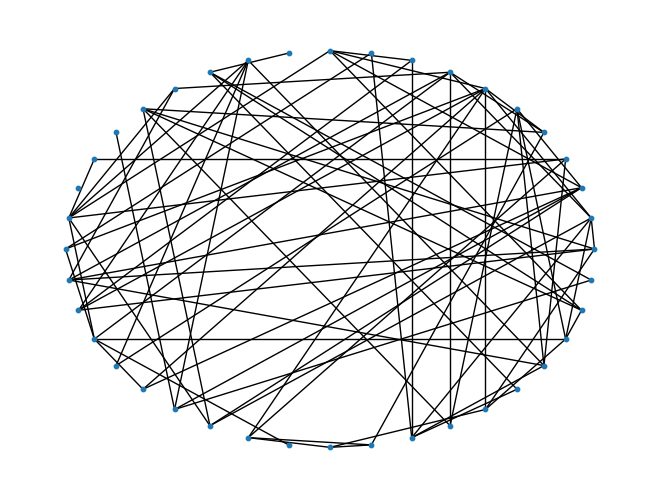

In [ ]:
G = getErdosRenyi(40, 0.1)
nx.draw_circular(G, node_size = 10)

## II. Propiedades de grafos aleatorios

En esta sección vamos a explorar algunas propiedades de los grafos Erdos-Renyi. Para esto, vamos a considerar grafos con una cantidad de nodos fija, $n=4000$.

#### Actividad 2:
Construye grafos $G(4000,p)$ utilizando la función que definiste en la primera sección de este laboratorio. Queremos ver qué pasa cuando la probabilidad $p$ varía. Para ello, considera el rango $[10^{-5},10^{-1}]$ y el comando *np.logspace*.  Para cada valor de $p$, crea 20 diferentes grafos y calcula la cantidad $N_i$ de nodos que tiene la componente conexa principal del grafo.  Construye una gráfica que muestre en el eje horizontal el valor de $p$ y en el vertical la cantidad **relativa** promedio de nodos $N_i$ respecto al total de nodos $n$ (i.e., los valores del eje vertical estarán entre 0 y 1).

Cuida los elementos de tu gráfica (ejes, color, etiquetas, título)

In [ ]:
# Código de la Actividad 2

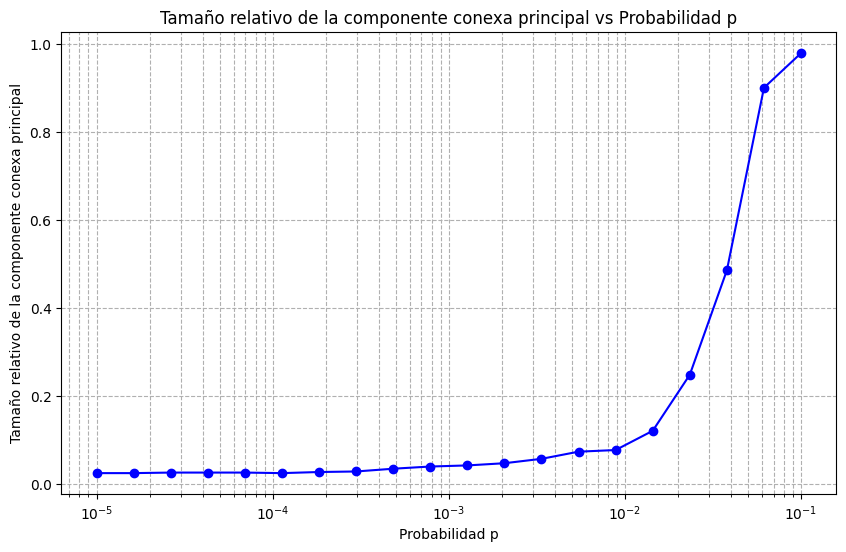

In [ ]:
n = 40
p_values = np.logspace(-5, -1, num=20)

relative_sizes = []

for p in p_values:
    sizes = []
    for _ in range(20):
        G = getErdosRenyi(n, p)
        largest_cc = max(nx.connected_components(G), key=len)
        sizes.append(len(largest_cc) / n)
    relative_sizes.append(np.mean(sizes))

plt.figure(figsize=(10, 6))
plt.semilogx(p_values, relative_sizes, marker='o', linestyle='-', color='blue')
plt.xlabel('Probabilidad p')
plt.ylabel('Tamaño relativo de la componente conexa principal')
plt.title('Tamaño relativo de la componente conexa principal vs Probabilidad p')
plt.grid(True, which="both", ls="--")
plt.show()

#### Actividad 3:
De acuerdo a lo que observaste en la actividad anterior, describe qué pasa cuando $p\approx 1/n$ y cuando $p\approx \log(n)/n$. ¿Qué hipótesis plantearías para grafos que tienen estos valores de $p$?

Cuando Ρ es aproximadamente 1/n, que en el caso de un grafo con n=4000
nodos sería p≈1/4000, se observa que el tamaño de la componente conexa principal es relativamente pequeño en comparación al tamaño total del grafo. Esto sugiere que a esta baja probabilidad, la mayoría de los nodos están aislados o forman componentes pequeñas desconectadas entre sí.

Por otro lado, cuando pp se aproxima a log⁡(n)/n, utilizando la base natural del logaritmo, para n=4000 tendríamos p≈log⁡(4000)/4000. En este punto, la gráfica muestra un crecimiento rápido y significativo en el tamaño de la componente conexa principal. Esto indica que hay un umbral de probabilidad de conexión en torno a log(n)/n donde la estructura del grafo cambia drásticamente y una gran componente conexa empieza a formarse, lo que es conocido como la transición de fase en un grafo aleatorio.

## III. Coeficiente de clustering

El *coeficiente de clustering* es una medida para estimar la tendencia de nodos a formar subgrafos densos (cliques, comunidades, clusters) dentro de un grafo. En redes sociales, por ejemplo, podríamos interpretar el coeficiente de clustering como la probabilidad de que dos amigos de una persona $X$ sean amigos entre sí (como en FB "personas que tal vez conozcas").

El coeficiente de clustering $C$ es un número entre 0 y 1 y está definido para cada nodo de la red. En particular, el coeficiente de clustering del nodo $i$ se denota por $C_i$ y se define como la fracción de parejas de vecinos del nodo $i$ que están conectadas entre ellas. En otras palabras, $C_i$ corresponde a la razón entre el número de triángulos que incluyen al nodo $i$ y el máximo número de triángulos en los que $i$ podría estar (las tripletas en las que aparece).


Formalmente, si el nodo $i$ tiene $k_i$ vecinos, decimos que
$$C_i = \frac{\tau(i)}{\tau_{max}(i)} = \frac{\tau(i)}{\binom {k_i}{2}} = \frac{\tau(i)}{k_i(k_i -1)},$$
en donde $\tau(i)$ es el número de triángulos en los que aparece el nodo $i$.

Para expresar el coeficiente de clustering de una red completa, se considera el promedio del coeficiente de clustering de todos los nodos:
$$C = \frac{\sum C_i}{n}.$$

En NetworkX, el comando **clustering** devuelve un diccionario con el coeficiente de clustering para cada nodo de una red. Mientras que el comando **average_clustering** devuelve $C$.

In [ ]:
# Cargamos nuestro clásico grafo de ejemplo
G = nx.karate_club_graph()

In [ ]:
# Esto devuelve un diccionario con el coeficiente de clustering
# C_i para cada nodo i de la red
nx.clustering(G)

In [ ]:
# Esto devuelve el coeficiente de clustering del nodo 29
nx.clustering(G,29)

In [ ]:
# Esto devuelve el coeficiente de clustering de toda la red
nx.average_clustering(G)

0.5706384782076823

#### Actividad 4:
Considera grafos similares a los que usaste en la Actividad 2 y grafica el coeficiente de clustering (el promedio sobre los 20 grafos aleatorios que se tienen para cada $p$) como una función de $p$.  

¿Ves alguna regularidad? ¿Hay alguna regla que sugerirías para el comportamiento que observas? Justifica tu respuesta.

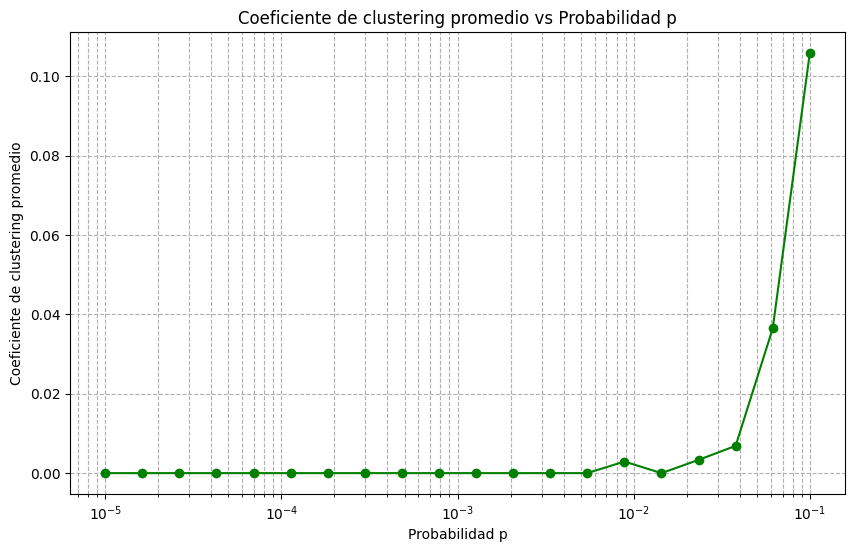

In [ ]:
n = 40
p_values = np.logspace(-5, -1, num=20)

clustering_coeffs = []

for p in p_values:
    coeffs = []
    for _ in range(20):
        G = getErdosRenyi(n, p)

        coeff = nx.average_clustering(G)
        coeffs.append(coeff)
    clustering_coeffs.append(np.mean(coeffs))

plt.figure(figsize=(10, 6))
plt.semilogx(p_values, clustering_coeffs, marker='o', linestyle='-', color='green')
plt.xlabel('Probabilidad p')
plt.ylabel('Coeficiente de clustering promedio')
plt.title('Coeficiente de clustering promedio vs Probabilidad p')
plt.grid(True, which="both", ls="--")
plt.show()

De la gráfica se observa que para valores bajos de Ρ, el coeficiente de clustering promedio es casi cero, lo que indica que hay muy pocos o ningún triángulo cerrado. Esto es consistente con la estructura de un grafo aleatorio, donde las conexiones son muy escasas cuando la probabilidad es baja, y por lo tanto, es menos probable que se formen tríadas conectadas.

A medida que P aumenta, el coeficiente de clustering se mantiene relativamente constante y cerca de cero hasta que pp alcanza valores cercanos a 0.1. En este punto, hay un incremento significativo y rápido en el coeficiente de clustering promedio. Esto sugiere que cuando la probabilidad de conexión pp es suficientemente alta, no solo aumenta la cantidad de conexiones en el grafo, sino que estas conexiones tienden a formar redes localmente densas, o clusters.